In [1]:
source('../../NMEG_utils/r_functions/load_nmeg.r')

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [2]:
seg <- daily_to_xts(get_daily_file('Seg', make_new=FALSE))
ses <- daily_to_xts(get_daily_file('Ses', make_new=FALSE))
wjs <- daily_to_xts(get_daily_file('Wjs', make_new=FALSE))
mpj <- daily_to_xts(get_daily_file('Mpj', make_new=FALSE))
vcp <- daily_to_xts(get_daily_file('Vcp', make_new=FALSE))
vcm <- daily_to_xts(get_daily_file('Vcm', make_new=FALSE))

In [3]:
# Load packages for calculating SPEI
# This package is on CRAN (https://cran.r-project.org/web/packages/SPEI/index.html)
# Website for the project is http://sac.csic.es/spei/index.html
#install.packages('SPEI')
library('SPEI')

Loading required package: lmomco
Loading required package: parallel
# Package SPEI (1.6) loaded [try SPEINews()].


In [4]:
get_spei <- function(df_t, numweeks, time_base='monthly', sitename='SPEI site', plot=TRUE){
    if (time_base=='weekly'){
    site_cwdiff <- (apply.weekly(df_t$P_F, FUN=sum) - 
                           apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
        }
    else if (time_base=='monthly'){
    site_cwdiff <- (apply.monthly(df_t$P_F, FUN=sum) - 
                           apply.monthly(df_t$PET_F_mm_daytime, FUN=sum))
        }

    colnames(site_cwdiff) <- paste(sitename, 'cwdiff', sep='_')
    # Not sure if this works - similar to the "SPEI" value Dan once calculated...
    #site_cwdiff$cwdiff_scaled <- (site_cwdiff$cwdiff / 
    #                              apply.weekly(df_t$PET_F_mm_daytime, FUN=sum))
    site_spei <- spei(site_cwdiff, numweeks, na.rm=TRUE)
    if (plot==TRUE){
        plot(site_spei, main=NULL)
        #title(main=title)
    }
    
    site_cwdiff$spei <- as.vector(site_spei$fitted)
    return(site_cwdiff)
}

#seg_cwdiff_m <- apply.monthly(seg$P_F, FUN=sum) - apply.monthly(seg$PET_F_mm_daytime, FUN=sum)

## Calculate SPEI using a monthly timestep

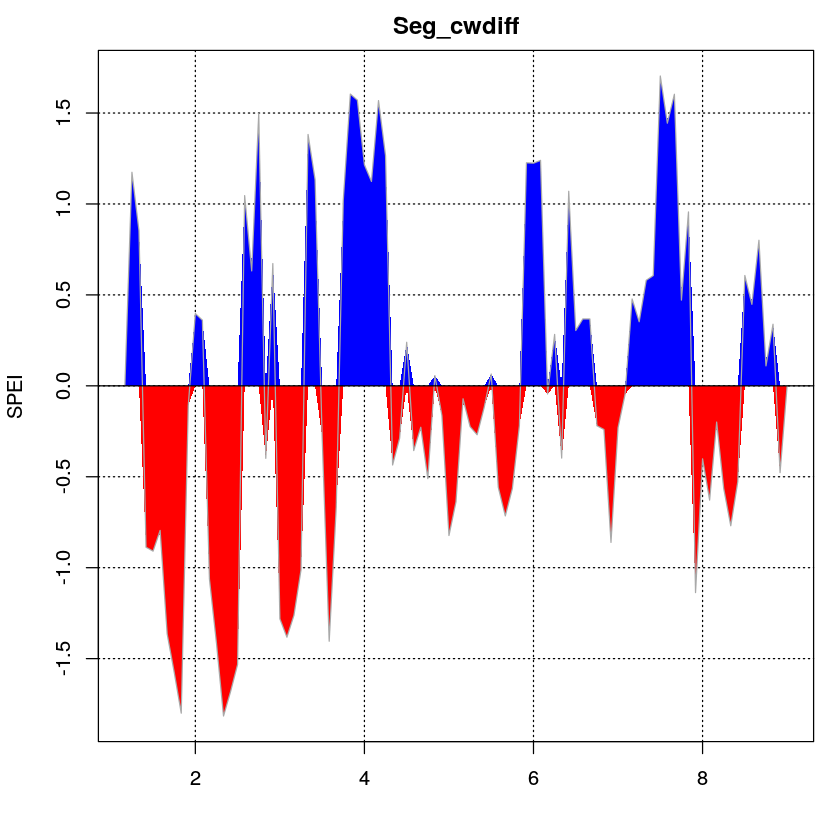

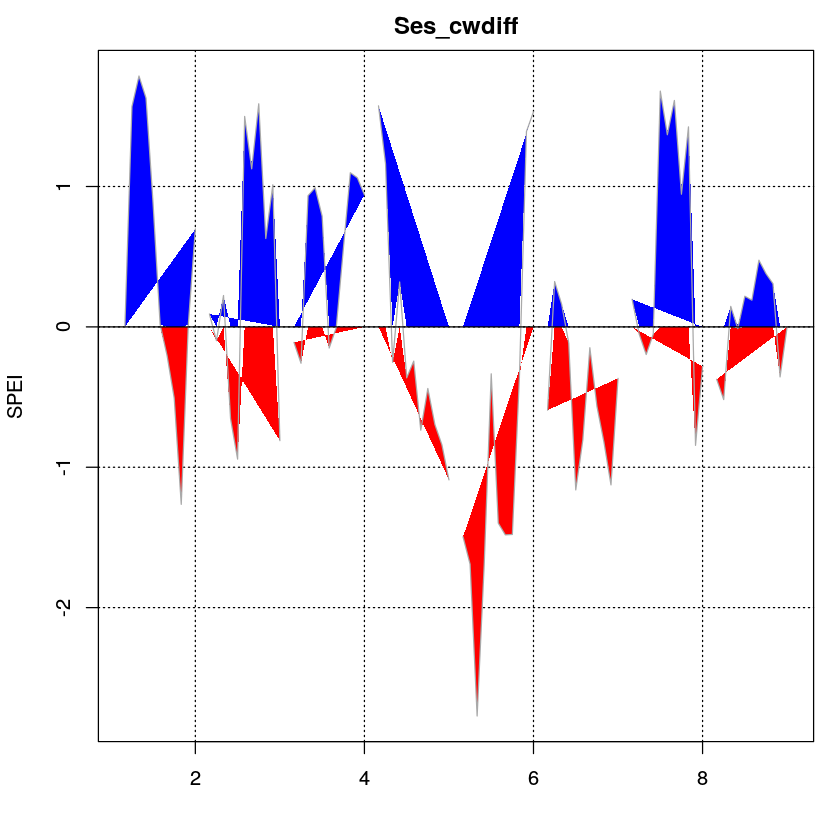

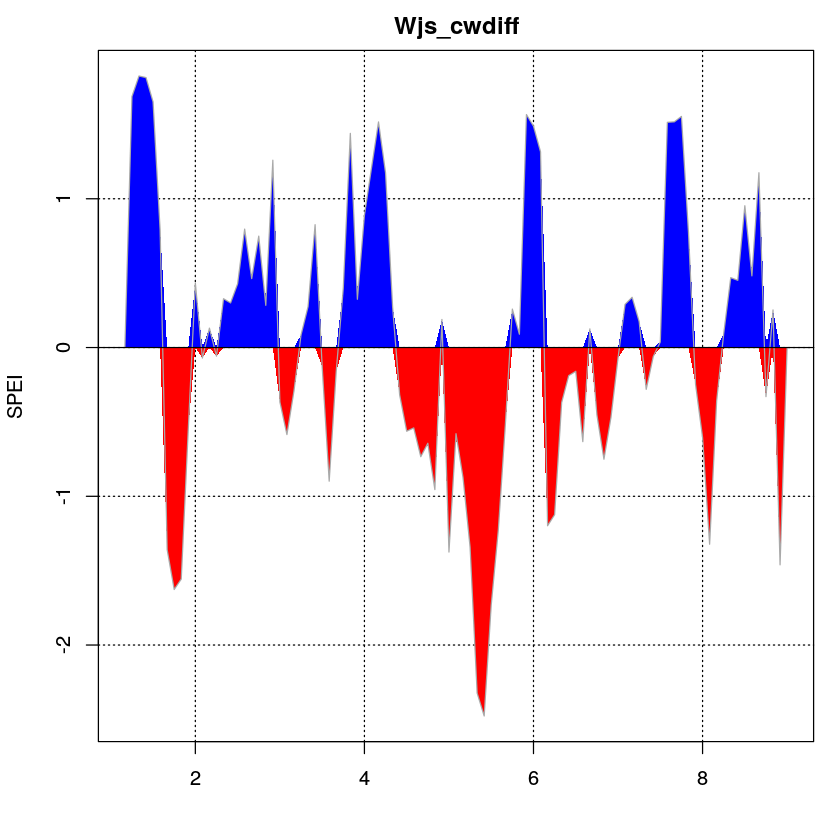

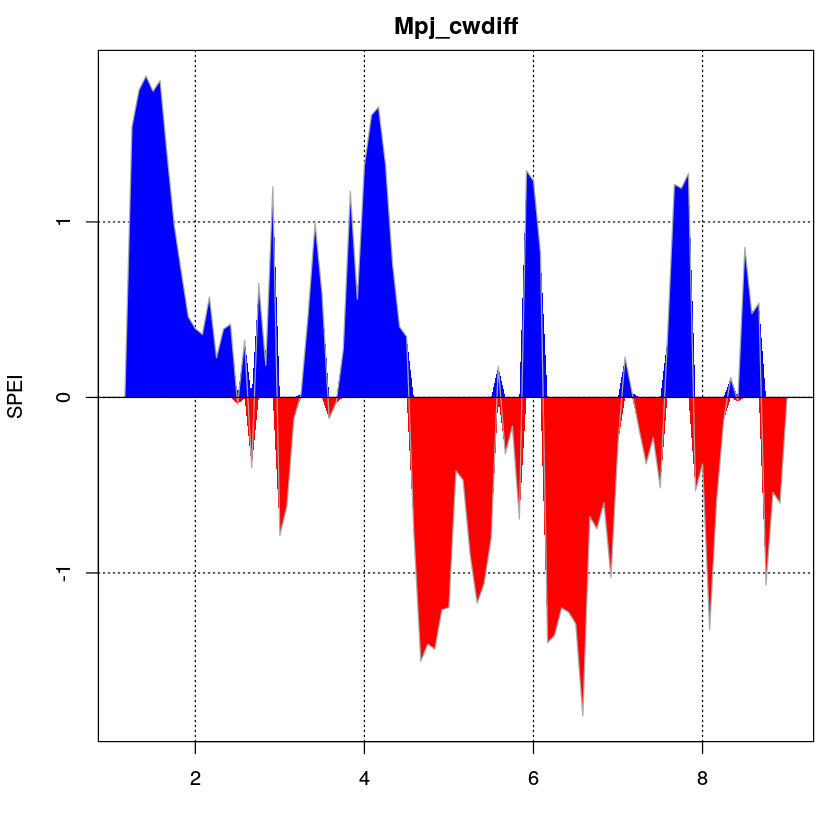

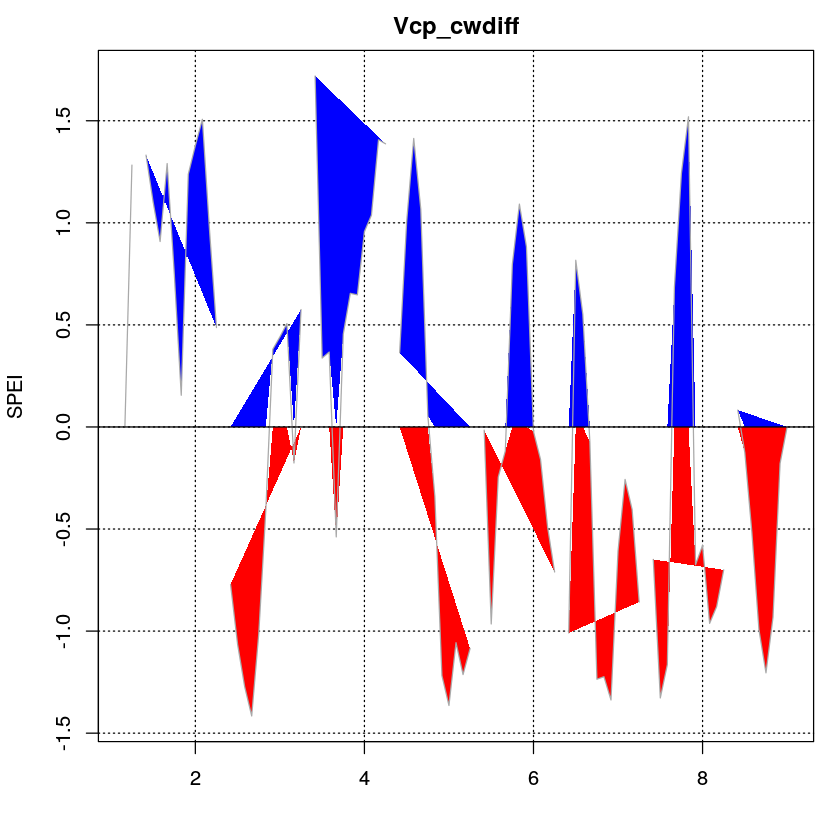

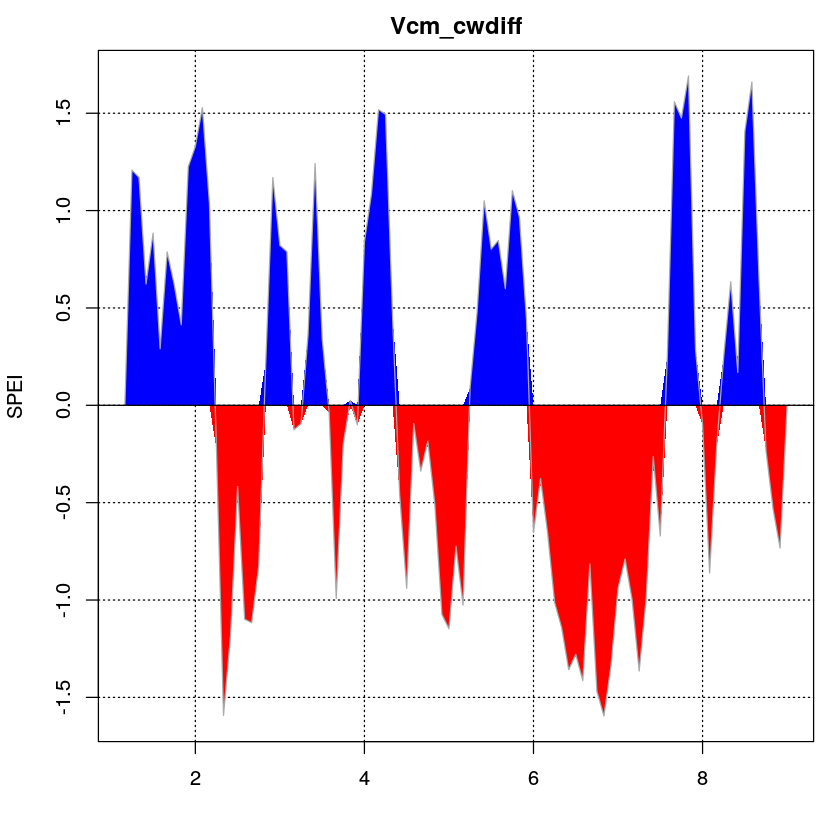

In [5]:
# 3 month SPEI
n_t_units = 3
spei_m_3 <- get_spei(seg, n_t_units, sitename='Seg')[,2]
colnames(spei_m_3) <- 'Seg'
spei_m_3$Ses <- get_spei(ses, n_t_units, sitename='Ses')[,2]
spei_m_3$Wjs <- get_spei(wjs, n_t_units, sitename='Wjs')[,2]
spei_m_3$Mpj <- get_spei(mpj, n_t_units, sitename='Mpj')[,2]
spei_m_3$Vcp <- get_spei(vcp, n_t_units, sitename='Vcp')[,2]
spei_m_3$Vcm <- get_spei(vcm, n_t_units, sitename='Vcm')[,2]

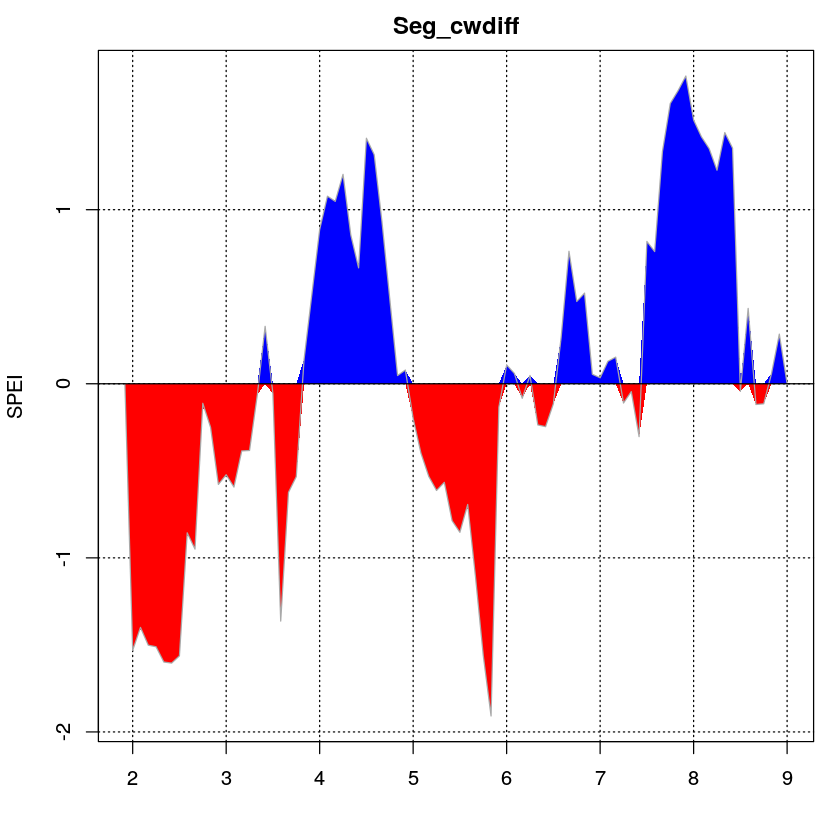

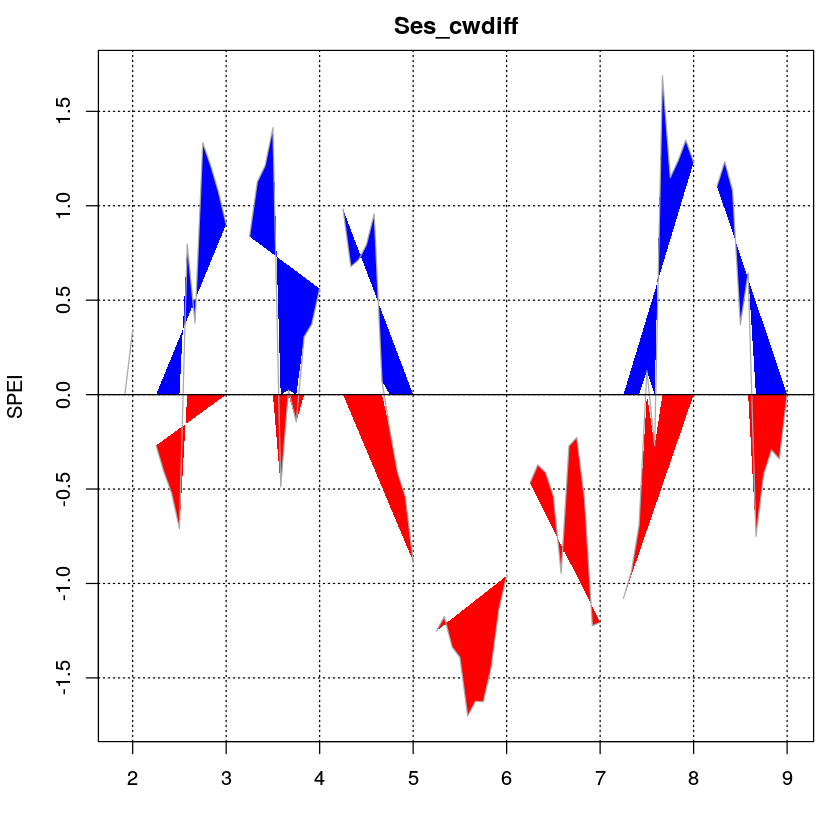

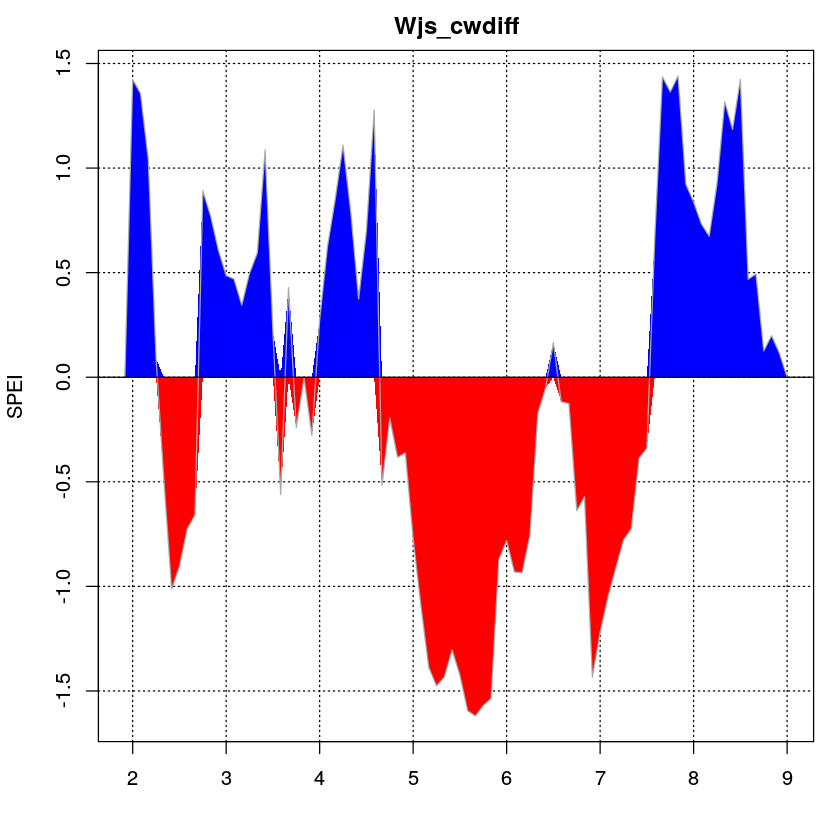

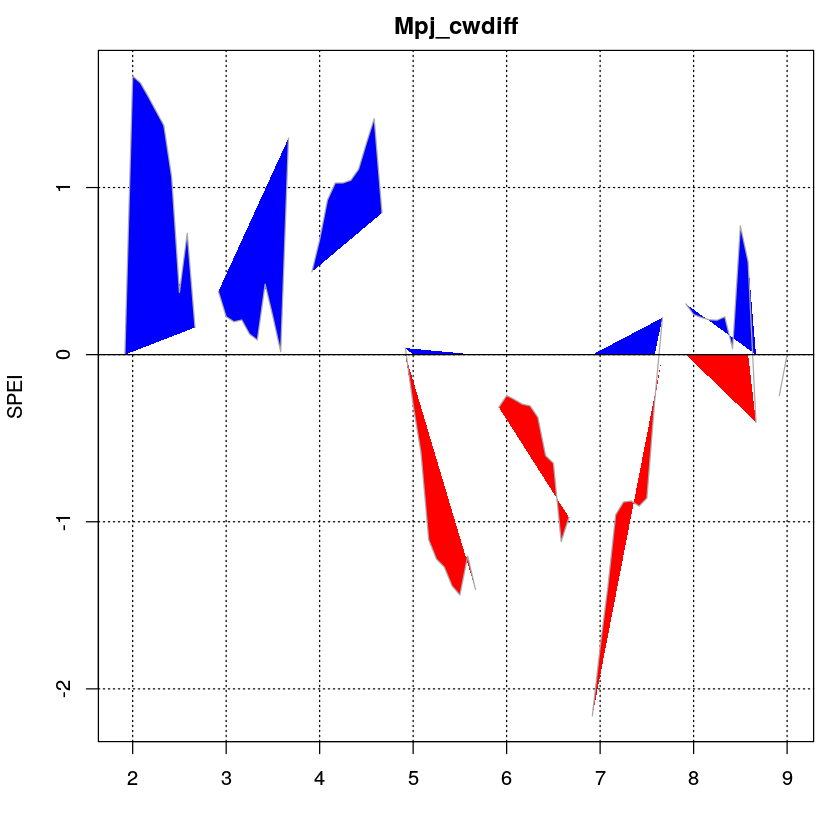

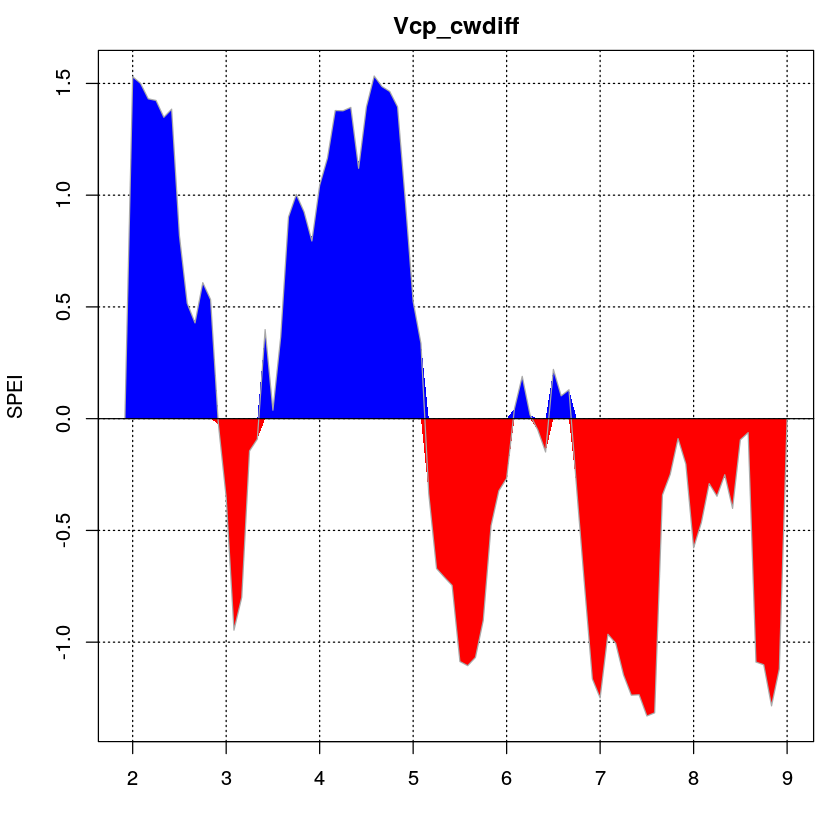

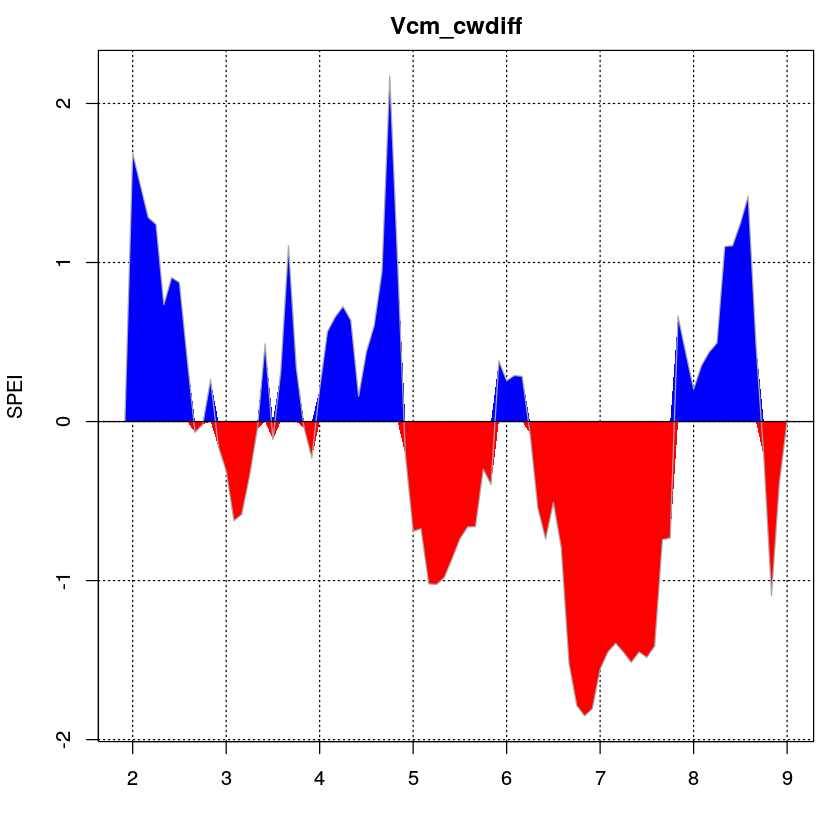

In [6]:
# 12 month SPEI
n_t_units = 12
spei_m_12 <- get_spei(seg, n_t_units, sitename='Seg')[,2]
colnames(spei_m_12) <- 'Seg'
spei_m_12$Ses <- get_spei(ses, n_t_units, sitename='Ses')[,2]
spei_m_12$Wjs <- get_spei(wjs, n_t_units, sitename='Wjs')[,2]
spei_m_12$Mpj <- get_spei(mpj, n_t_units, sitename='Mpj')[,2]
spei_m_12$Vcp <- get_spei(vcp, n_t_units, sitename='Vcp')[,2]
spei_m_12$Vcm <- get_spei(vcm, n_t_units, sitename='Vcm')[,2]

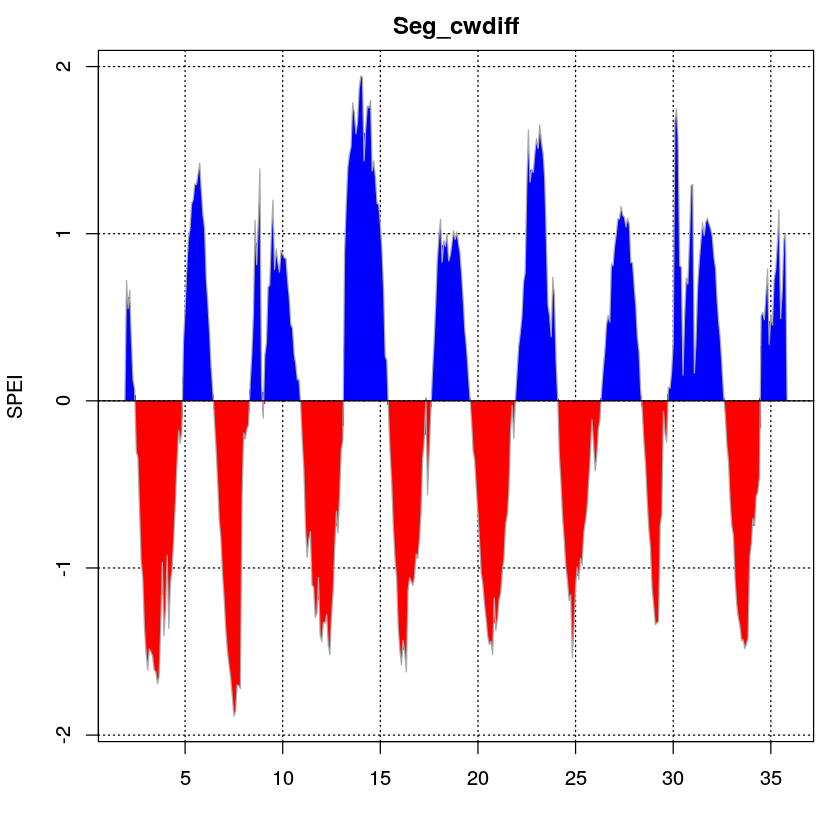

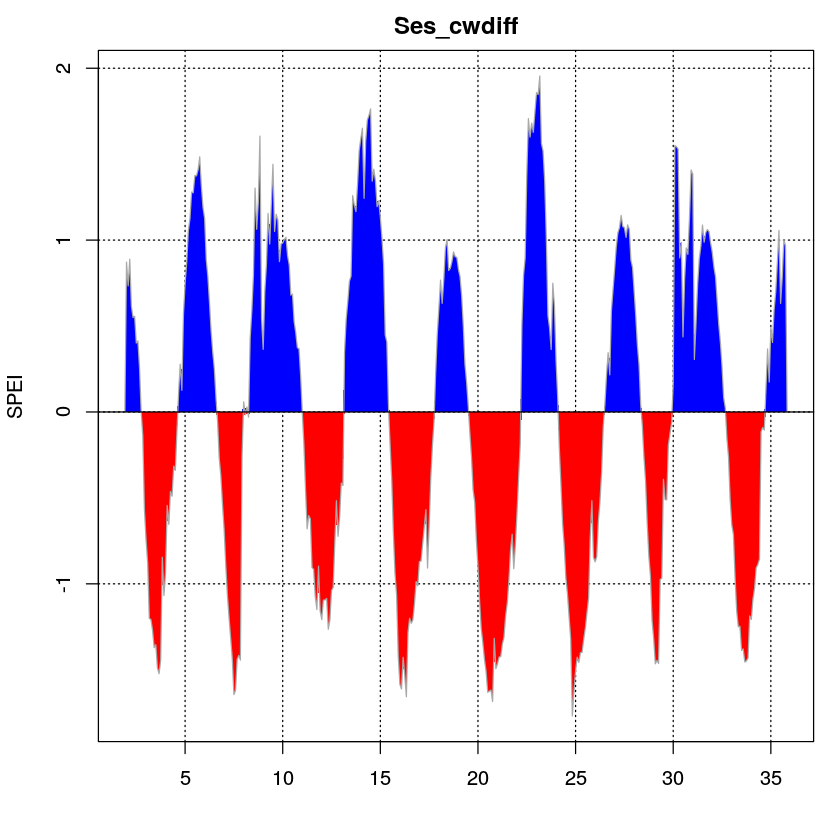

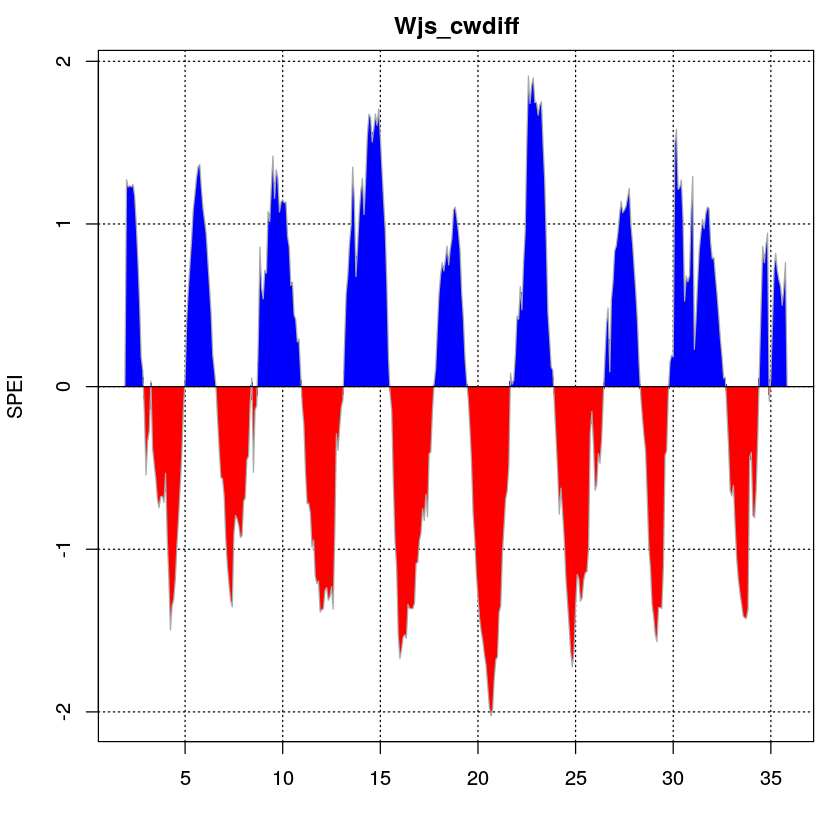

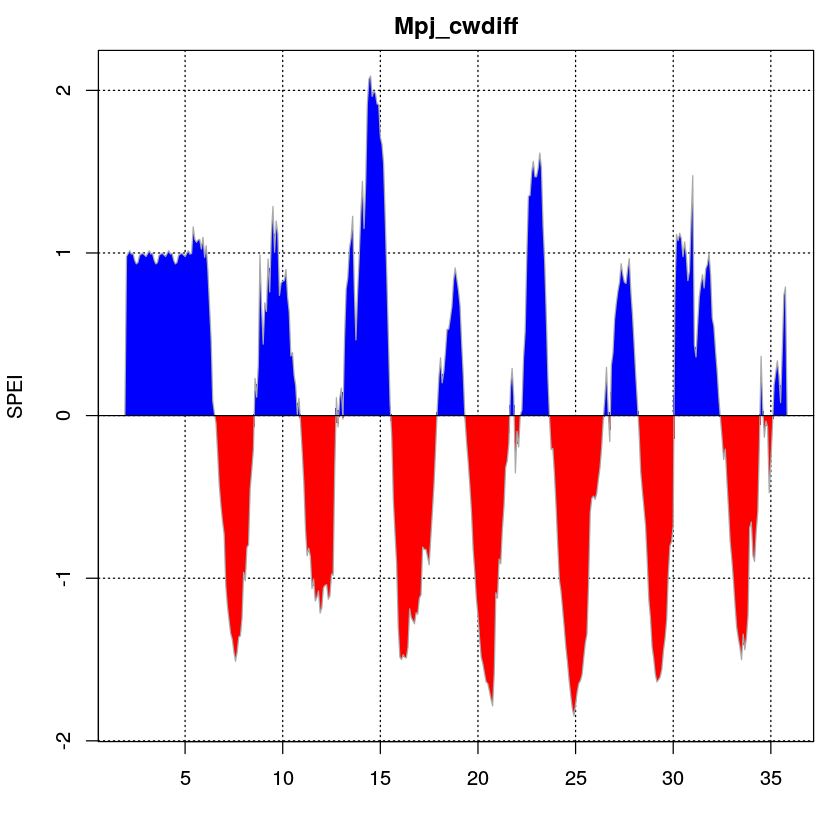

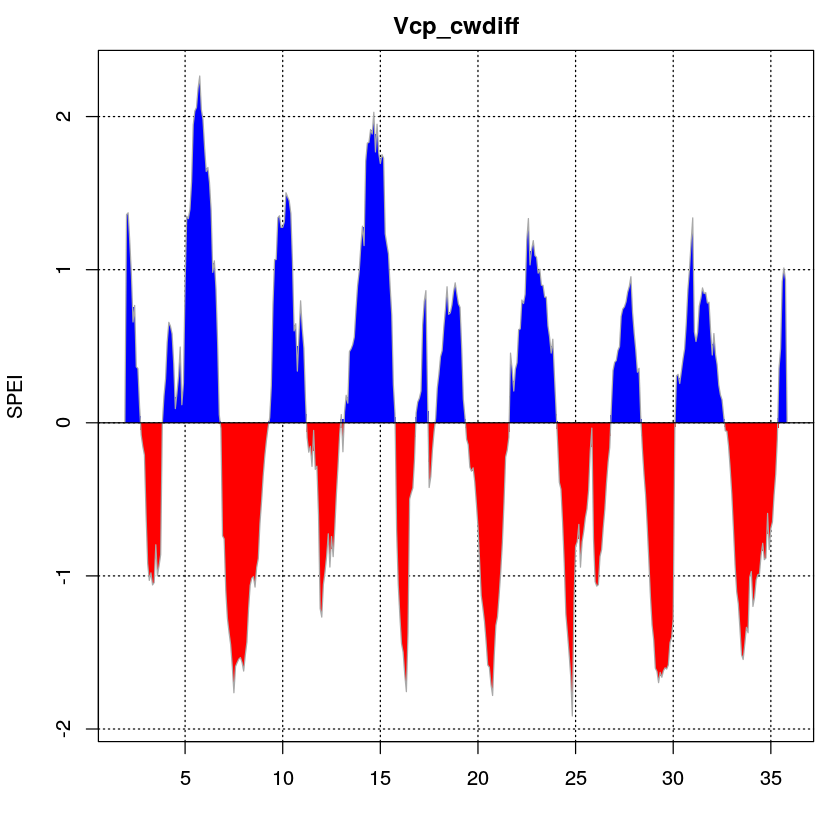

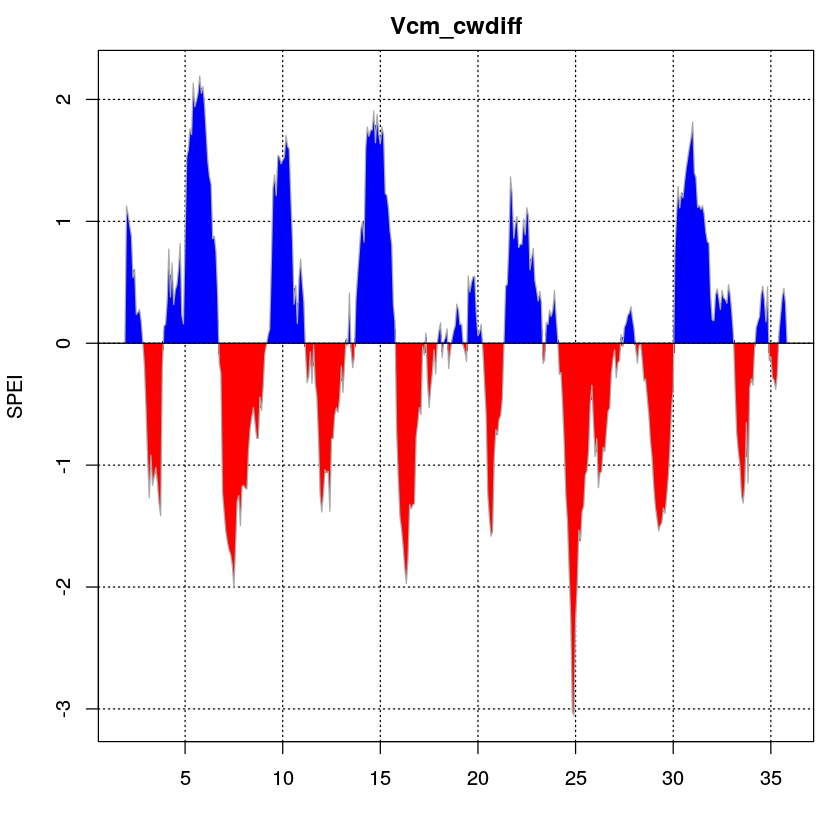

In [7]:
# 12 week SPEI
n_t_units = 12
spei_w_12 <- get_spei(seg, n_t_units, time_base='weekly', sitename='Seg')[,2]
colnames(spei_w_12) <- 'Seg'
spei_w_12$Ses <- get_spei(ses, n_t_units, time_base='weekly', sitename='Ses')[,2]
spei_w_12$Wjs <- get_spei(wjs, n_t_units, time_base='weekly', sitename='Wjs')[,2]
spei_w_12$Mpj <- get_spei(mpj, n_t_units, time_base='weekly', sitename='Mpj')[,2]
spei_w_12$Vcp <- get_spei(vcp, n_t_units, time_base='weekly', sitename='Vcp')[,2]
spei_w_12$Vcm <- get_spei(vcm, n_t_units, time_base='weekly', sitename='Vcm')[,2]

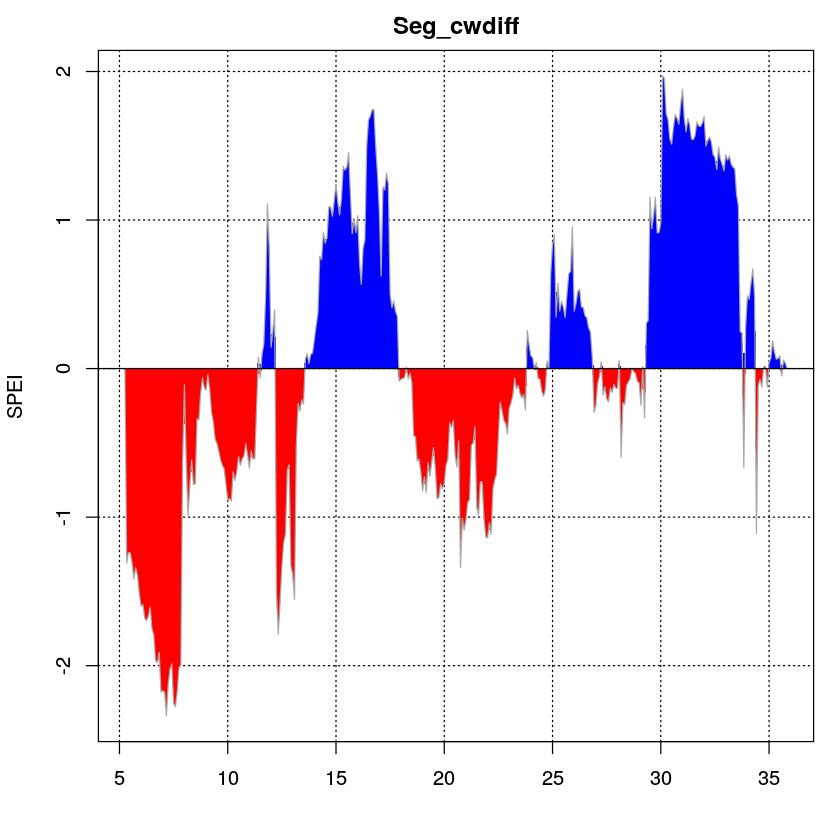

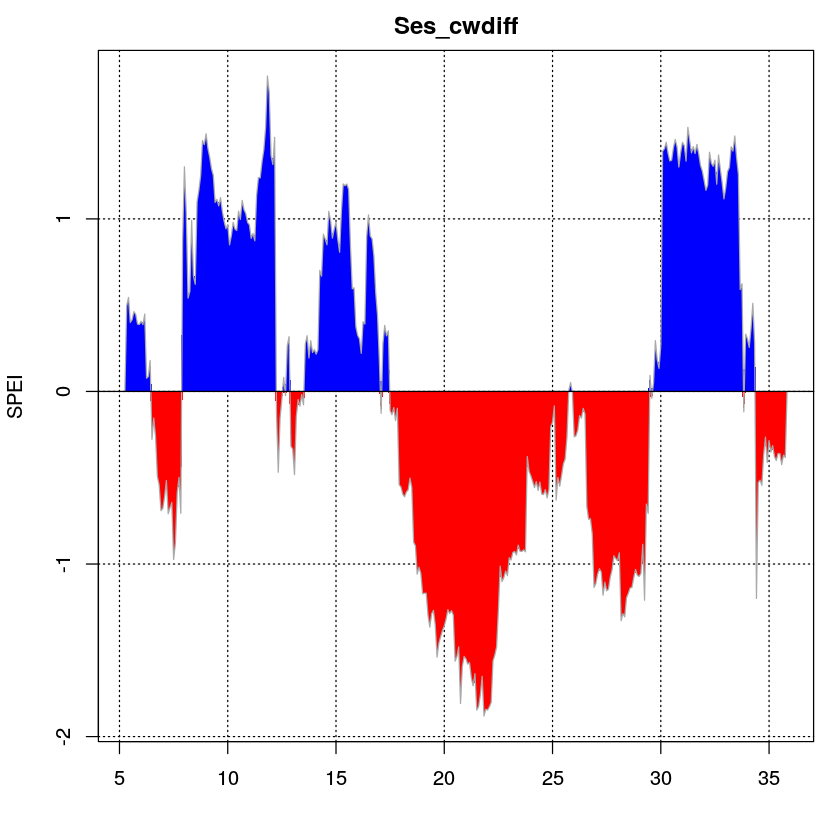

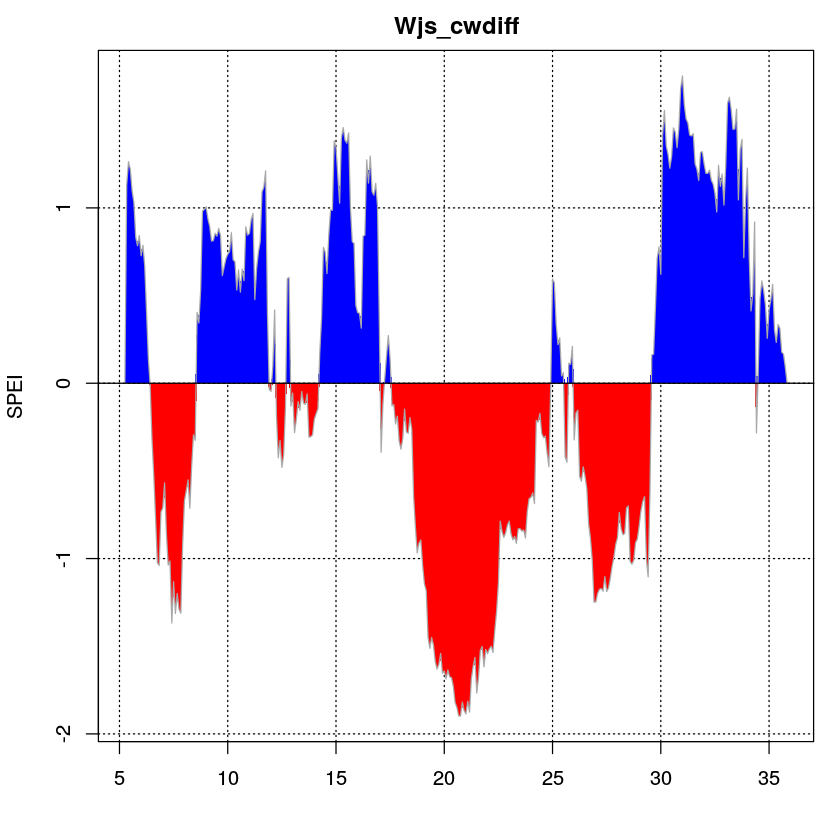

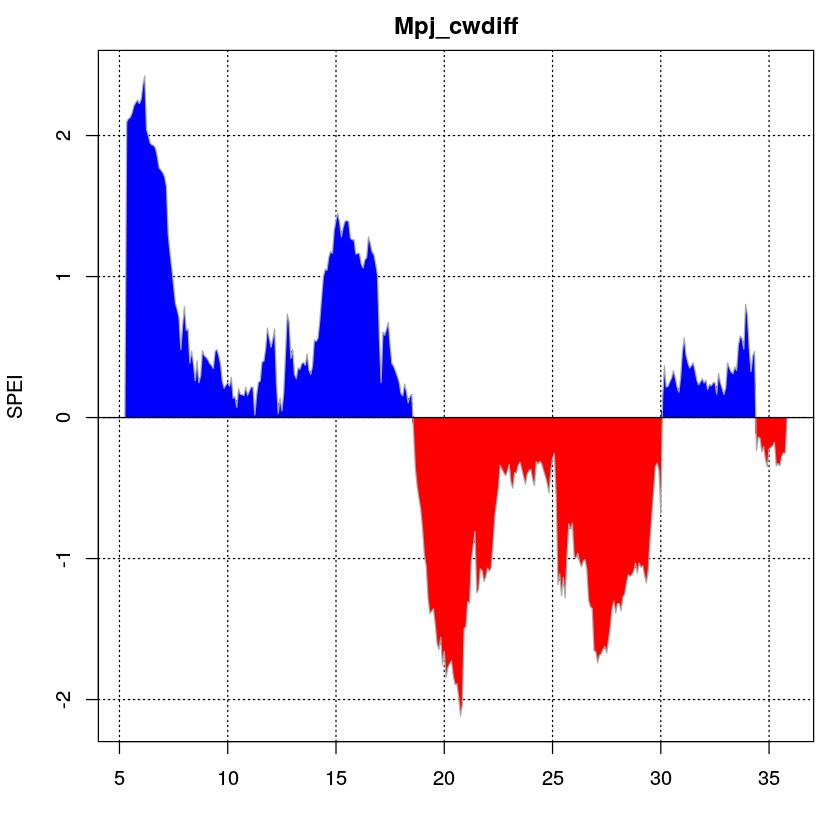

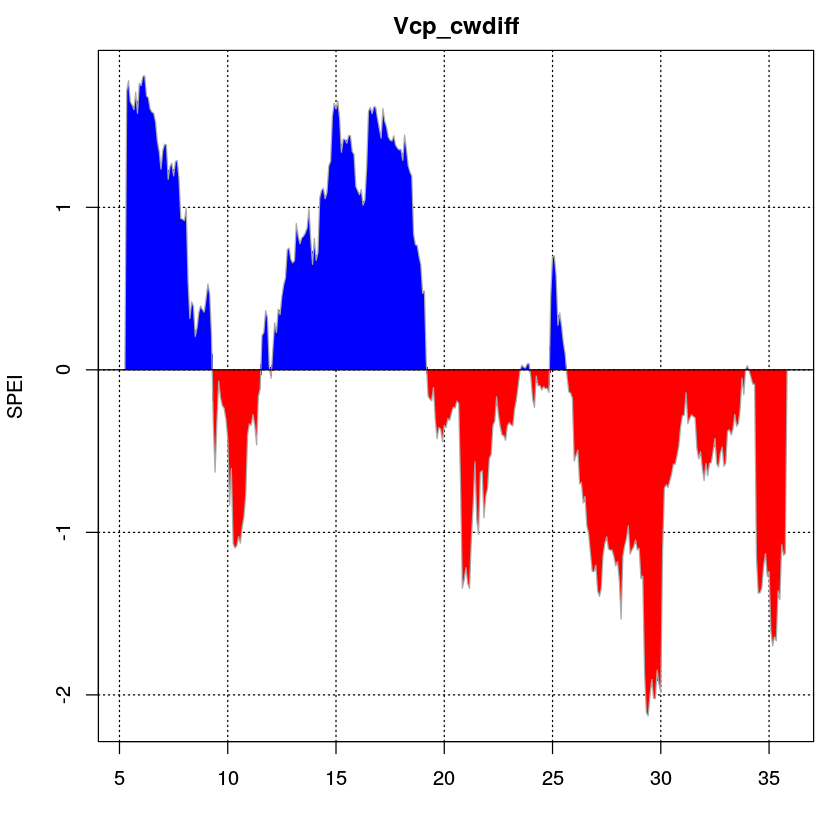

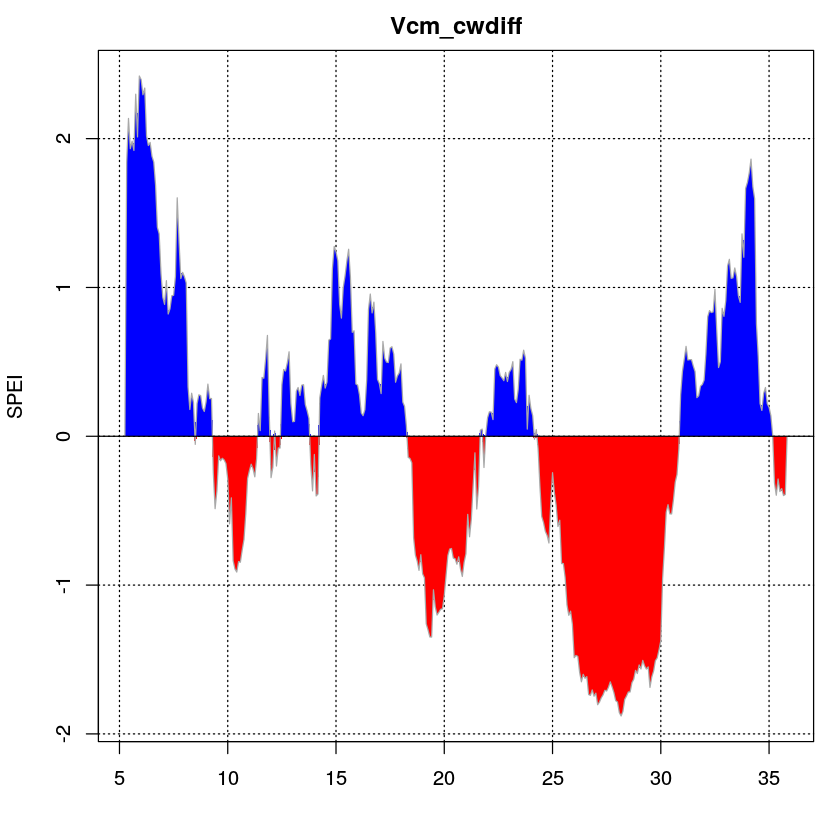

In [8]:
# 52 week SPEI
n_t_units = 52
spei_w_52 <- get_spei(seg, n_t_units, time_base='weekly', sitename='Seg')[,2]
colnames(spei_w_52) <- 'Seg'
spei_w_52$Ses <- get_spei(ses, n_t_units, time_base='weekly', sitename='Ses')[,2]
spei_w_52$Wjs <- get_spei(wjs, n_t_units, time_base='weekly', sitename='Wjs')[,2]
spei_w_52$Mpj <- get_spei(mpj, n_t_units, time_base='weekly', sitename='Mpj')[,2]
spei_w_52$Vcp <- get_spei(vcp, n_t_units, time_base='weekly', sitename='Vcp')[,2]
spei_w_52$Vcm <- get_spei(vcm, n_t_units, time_base='weekly', sitename='Vcm')[,2]

In [9]:
tail(spei_w_12)

                 Seg       Ses       Wjs        Mpj        Vcp         Vcm
2014-11-30 0.9426591 0.8710675 0.7132518 0.33649773 -0.1070014 -0.25660675
2014-12-07 1.1426789 1.0564913 0.6558666 0.24340435  0.3542236  0.08867181
2014-12-14 0.4921622 0.6313128 0.6167952 0.07980315  0.4842686  0.23414323
2014-12-21 0.6593186 0.7850768 0.4998066 0.38991788  0.9231861  0.37997961
2014-12-28 0.9645495 1.0005919 0.6115033 0.74029837  1.0111178  0.45059826
2014-12-31 1.0007885 0.9682214 0.7629352 0.79069557  0.9343729  0.33035322

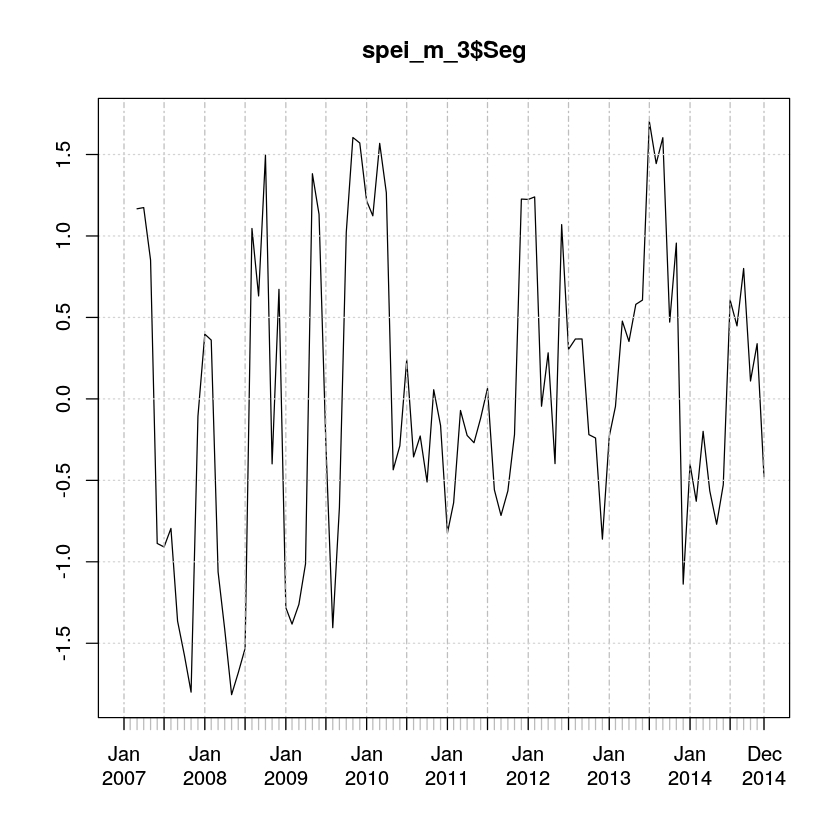

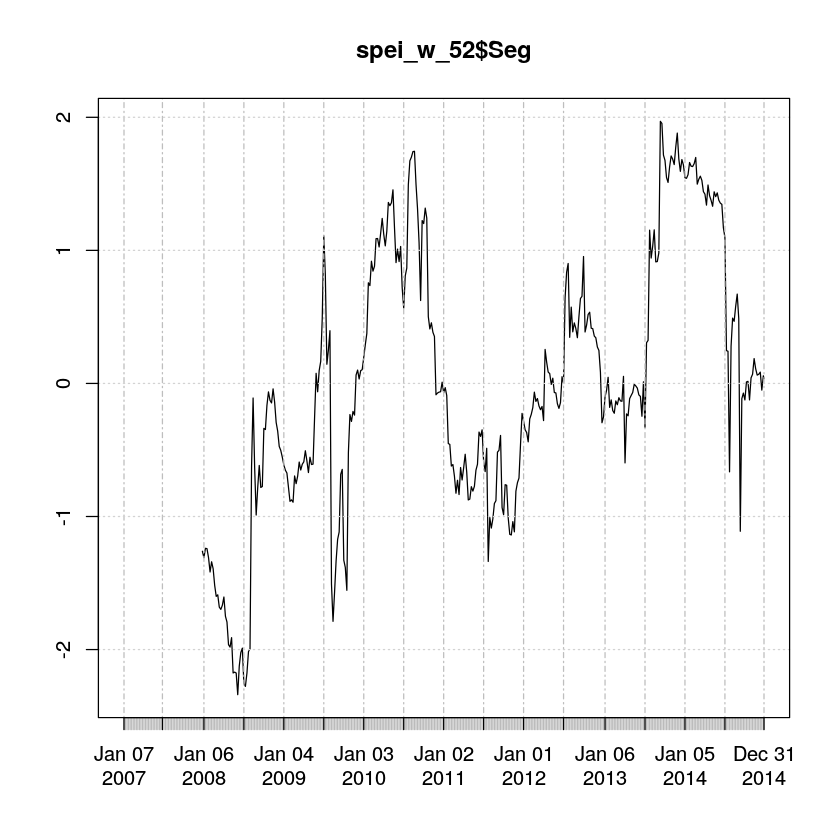

In [10]:
plot(spei_m_3$Seg)
plot(spei_w_52$Seg)
write.zoo(spei_m_3, file='../../NMEG_utils/processed_data/SPEI_m_3mo_allsites.csv', sep=",")
write.zoo(spei_w_52, file='../../NMEG_utils/processed_data/SPEI_w_12mo_allsites.csv', sep=",")